# Data Visualization in Python

**Author: Moumita Saha**
<br>
**Student of Computer Science and Engineering**
<br>
**UODA,Dhaka,Bangladesh**

# Dataset Reference:
**https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw**

**OBJECTIVES:**

1.Data Visualization using NumPy and Pandas
<br>
2.Importing necessary python packages
<br>
3.Reading excel (.csv) file
<br>
4.Finding number of unique values present in the DataFrame
<br>
5.Writing functions in Python
<br>
6.Data Visualization by using Bar Plot
<br>
7.Changing the context of a plot
<br>
8.Creating subplots
<br>
9.Histogramic Analysis for VW Used Cars Based on Year, Price, Mileage and mpg
<br>
10.Probabilistic Analysis of VW used Cars for Price and Mileage
<br>
11.Distributive Analysis of VW used cars Price for fuelType 
<br>
12.Boxplot for VW cars price and mileage analysis based on fuelType and transmission respectively<br>
13.Linear Regression

**Importing required libraries and packages**

In [87]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context('talk')

**Reading a csv file as pandas DataFrame**

In [88]:
df = pd.read_csv("vw.csv")

display(df)

print("The first five rows of the dataframe:")
display(df.head(5))

print("The last five rows of the dataframe:")
display(df.tail(5))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,39.8,1.5
...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,46.3,1.2


The first five rows of the dataframe:


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,39.8,1.5


The last five rows of the dataframe:


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
15152,Eos,2012,5990,Manual,74000,Diesel,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,46.3,1.2
15156,Fox,2007,2295,Manual,74000,Petrol,46.3,1.2


**Data Set Info**

In [89]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   mpg           15157 non-null  float64
 7   engineSize    15157 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 947.4+ KB


None

**Unique Value Observation Function**

Here, showing the function to find out the number of observations for the unique values in a column of the Data Set:

In [90]:
def unique_val_count(data, column):
    df_count = df[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

**Getting the numbers of observations for unique values in a column of the Data Set:**

In [91]:
model_count = unique_val_count(df, 'model')
year_count = unique_val_count(df, 'year')
transmission_count = unique_val_count(df, 'transmission')
fuelType_count = unique_val_count(df, 'fuelType')

#sorting the year_count DataFrame depending on 'year'
year_count = year_count.sort_values(by='year')

**Showing the observations of VW used cars Data Set using different Plots:**

**Barplot**

Creating a function to show the number of observations for each unique value in a column through **Barplot**:

In [92]:
def barplot(data, column_x, color, rotation, yticks):
    #creating barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    #Giving a name/title of the plot
    plt.title("Number of cars present for each " + column_x)
    
    #Labeling of X and Y axis
    plt.xlabel(column_x)
    plt.ylabel("Percentage of cars (%)")
    
    #Rotating the xticks (if necessary)
    plt.xticks(rotation=rotation)
    
    #Providing a range for the yticks
    plt.yticks(yticks)

Creating SubPlots:

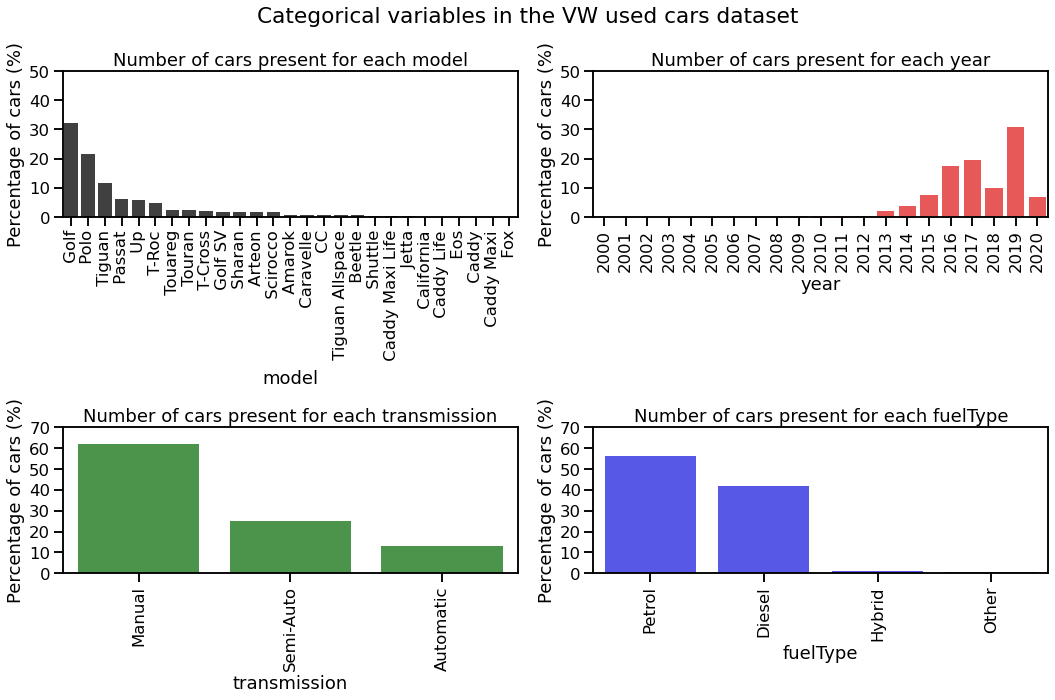

In [93]:
sns.set_context('talk')

plt.figure(figsize=(15,10))

#row 1, column 1
plt.subplot(2,2,1)
barplot(model_count, 'model', 'black', 90, np.arange(0,51,10))

#row 1, column 2
plt.subplot(2,2,2)
barplot(year_count, 'year', 'red', 90, np.arange(0,51,10))

#row 2, column 1
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'green', 90, np.arange(0,71,10))

#row 2, column 2
plt.subplot(2,2,4)
barplot(fuelType_count, 'fuelType', 'blue', 90, np.arange(0,71,10))

# Writing the title for all the plots
plt.suptitle("Categorical variables in the VW used cars dataset")

# keeping the individual plots separate from each other
plt.tight_layout()

# now displaying the plots
plt.show()

Elaboration of the plots showing above:
<br>
1. Model Subplot: From the model subplot we can clearly say that "Golf" model's cars are the most available among all cars.
<br>
<br>
2. Year Subplot: From the year subplot it can be said that most of the cars were built in year 2019 whereas year 2020's car were presented less than the cars of 2016's,2017's cars.
<br>
<br>
3. Transmission Subplot: The transmission subplot representing that 60% cars are Manual whereas more than 20% are Semi-Auto and less than 20% or more than 10% are Automatic.
<br>
<br>
4. Fuel Type Subplot: The FuelType subplot indicates that most of the people are interested in using those cars which has the fueltype "Petrol". But we can see more than 40% of "Diesel" fueltype cars are used whereas the user of "Hybrid" and "other" fueltype cars are too much low in quantity.

**Scatter Plot**

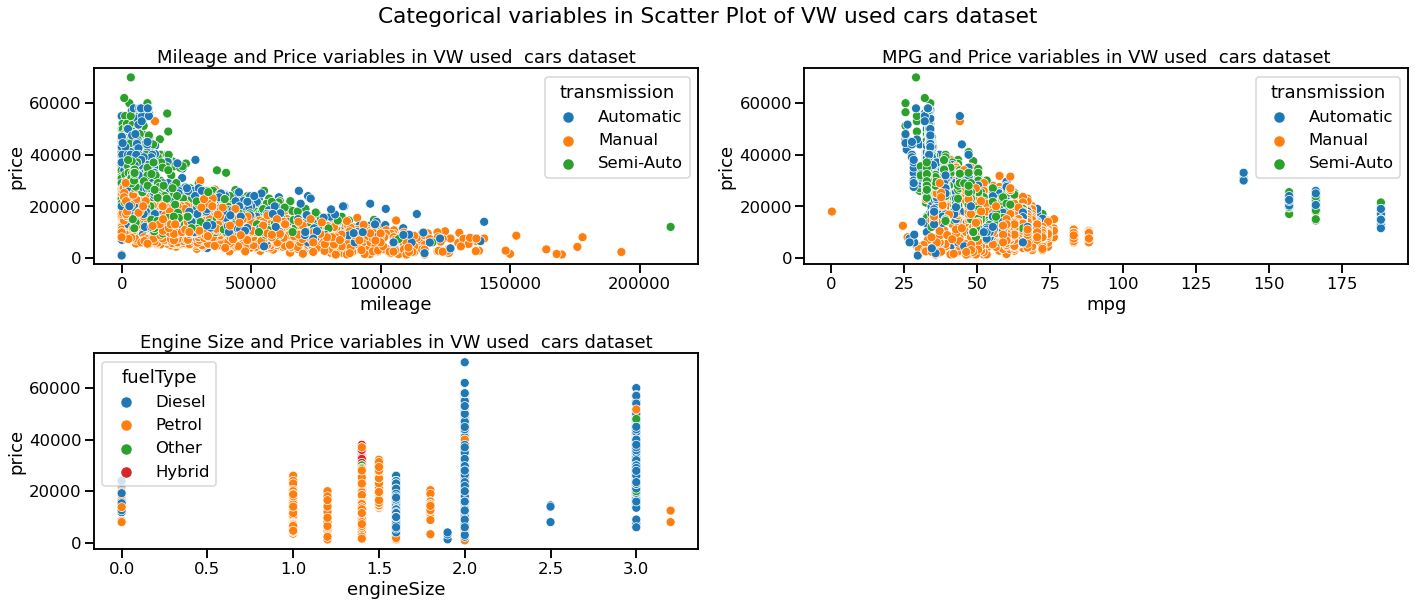

In [94]:
plt.figure(figsize=(20,12))

#Plot for Mileage vs Price
plt.subplot(3,2,1)
sns.scatterplot(x='mileage', y='price', data=df, hue='transmission')
plt.title("Mileage and Price variables in VW used  cars dataset")

#Plot for MPG vs Price
plt.subplot(3,2,2)
sns.scatterplot(x='mpg', y='price', data=df, hue='transmission')
plt.title("MPG and Price variables in VW used  cars dataset")

#Plot for Engine size vs Price
plt.subplot(3,2,3)
sns.scatterplot(x='engineSize', y='price', data=df, hue='fuelType')
plt.title("Engine Size and Price variables in VW used  cars dataset")

# Title
plt.suptitle("Categorical variables in Scatter Plot of VW used cars dataset")

# rotating the xticks
plt.xticks()

# providing a range for yticks
plt.yticks()

# keeping the individual plots separate from each other
plt.tight_layout()

#now showing the plots
plt.show()

Here the scatter plot is showing a clear difference of the cars with different categories.
<br>
1. Mileage vs Price Subplot: From this plot we get a clear idea about which car is most expensive and what is the relation of them with respect to price. So, it can be clearly said that Semi-Auto cars are the most expensive cars among them. Where the Manual type is costly from time to time. Manual cars are reasonably priced. Here, an inversely prportionl relationship exist between Price and Mileage. 
<br>
<br>
2. MPG vs Price Subplot: Here, also an inversely proportional relationship exists between price and mpg. So, Prices are decreasing moderately with the increasing unit of MPG. 
<br>
<br>
3. Engine Size Subplot: Here, the price vs engine size subplot doesn't provide us a clear visualization of datas. So most probably it can be said an example of bad data visualization.

**Histogram**

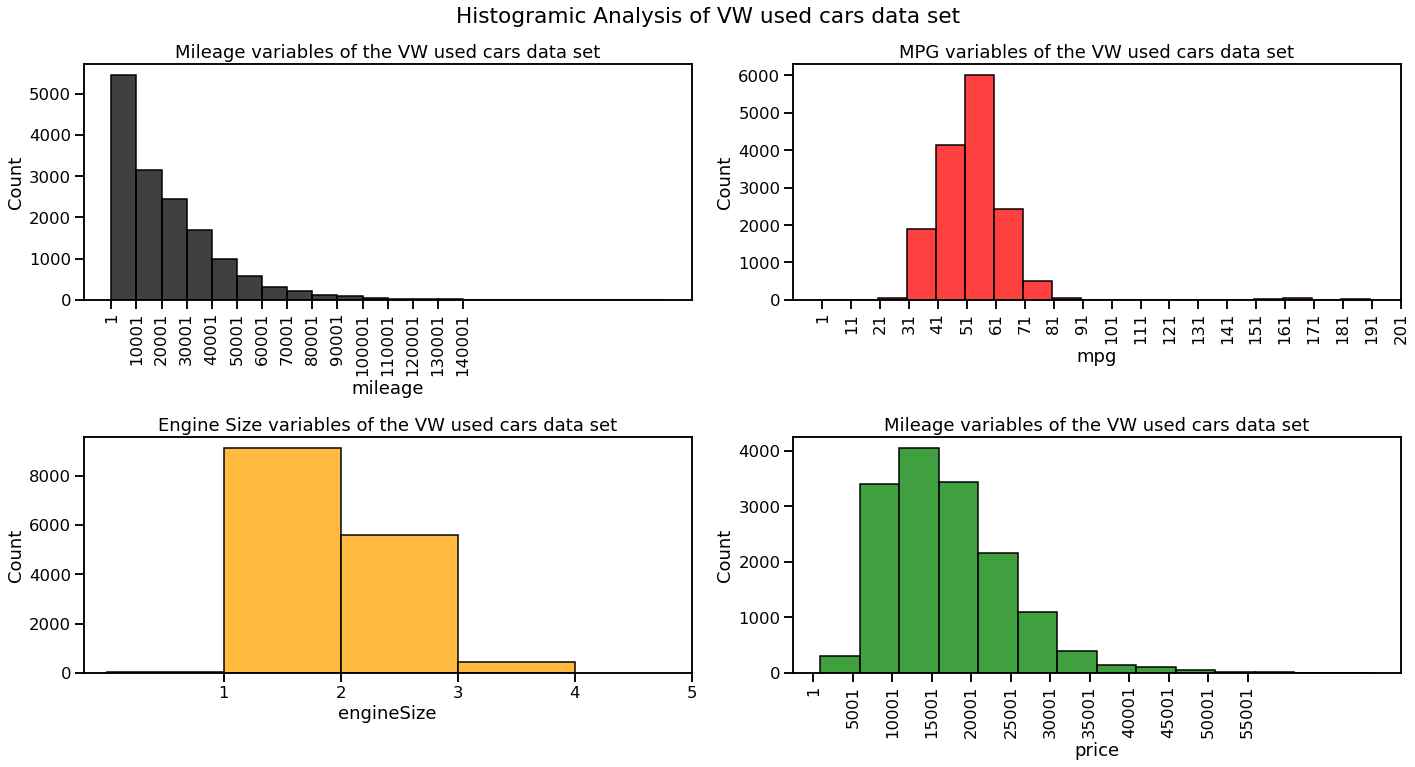

In [95]:
plt.figure(figsize=(20,15))

#Title
plt.suptitle("Histogramic Analysis of VW used cars data set")

#subplot row 1 column 1 mileage
plt.subplot(3,2,1)
sns.histplot(data=df, x='mileage', binwidth=10000, color = "black")
plt.xticks(np.arange(1,150000,10000), rotation=90)
plt.title("Mileage variables of the VW used cars data set")

#subplot row 1 column 2 miles per gallon
plt.subplot(3,2,2)
sns.histplot(data=df, x='mpg', binwidth=10, color = "red")
plt.xticks(np.arange(1,210,10), rotation=90)
plt.title("MPG variables of the VW used cars data set")

#subplot row 2 column 1 engine size
plt.subplot(3,2,3)
sns.histplot(data=df, x='engineSize', binwidth=1, color = "orange")
plt.xticks(np.arange(1,6,1), rotation=0)
plt.title("Engine Size variables of the VW used cars data set")

#subplot row 2 column 2 price
plt.subplot(3,2,4)
sns.histplot(data=df, x='price', binwidth=5000, color = "green")
plt.xticks(np.arange(1,57000,5000), rotation=90)
plt.title("Mileage variables of the VW used cars data set")

#Rotating the xticks
plt.xticks()

#Providing a range for the yticks
plt.yticks()

# keeping the individual plots separate from each other
plt.tight_layout()

#now showing the plots
plt.show()

Elaboration of the plots showing above:
<br>
1.Mileage Subplot: Mileage Plot is showing that an inversely proportional relationship exists between the number of cars and mileage. Here, the number of cars is decreasing when the mileage is successively.
<br>
<br>
2. MPG Subplot: This plot is showing that most of the MPG counts are between 41 and 61.
<br>
<br>
3. Engine Size Subplot: This plot is showing that most of the car's enginesize is 1.
<br>
<br>
4. Price Subplot:This plot is showing that most of the car's price range is in between 10001 to 15001.

**Distribution Plot**

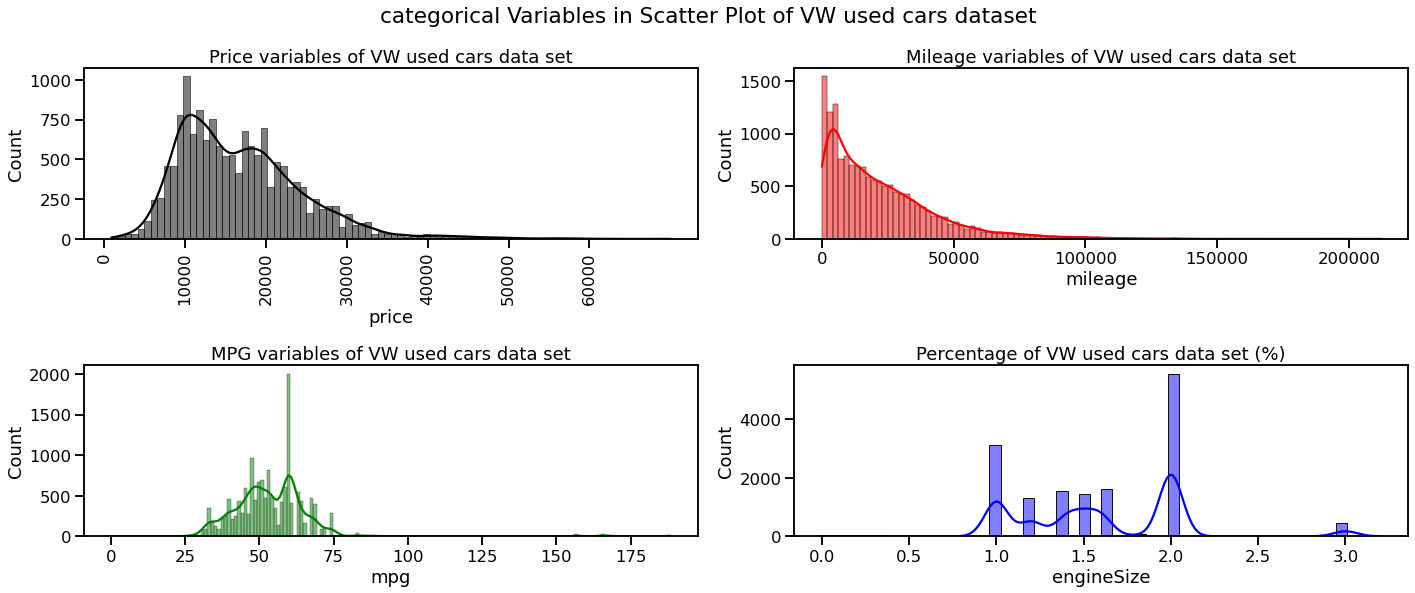

In [96]:
plt.figure(figsize=(20,12))

#Title of the Plot
plt.suptitle("categorical Variables in Scatter Plot of VW used cars dataset")

#Subplot row 1 column 1 price
plt.subplot(3,2,1)
sns.histplot(data=df, x='price', kde=True, color= "black")
plt.xticks(np.arange(0,70000,10000), rotation=90)
plt.title("Price variables of VW used cars data set")

#Subplot row 1 column 2 mileage
plt.subplot(3,2,2)
sns.histplot(data=df, x='mileage', kde=True, color= "red")
plt.title("Mileage variables of VW used cars data set")

#Subplot row 2 column 1 miles per gallon
plt.subplot(3,2,3)
sns.histplot(data=df, x='mpg', kde=True, color= "green")
plt.title("MPG variables of VW used cars data set")

#Subplot row 2 column 2 engine size
plt.subplot(3,2,4)
sns.histplot(data=df, x='engineSize', kde=True, color= "blue")
plt.title("Percentage of VW used cars data set (%)")

#Rotating the xticks
plt.xticks()

#Providing a range for the yticks
plt.yticks()

# keeping the individual plots separate from each other
plt.tight_layout()

#now showing the plots
plt.show()

These histograms are providing us a clear idea to differentiate the car's with different different categories:
<br>
1.Price Subplot: This plot is showing that the highest price of the cars is 10000.
<br>
<br>
2.Mileage subplot: This plot is representing that cars number are decreasing successively when the mileage is increasing.
<br>
<br>
3.MPG Subplot:This plot is indicating that most of the MPG counts are in between 5o and 75 units. Around 60 unit.
<br>
<br>
4.Engine Size Plot: This plot is representing that most of the car's engine size is 2.

**ECDF Plot**

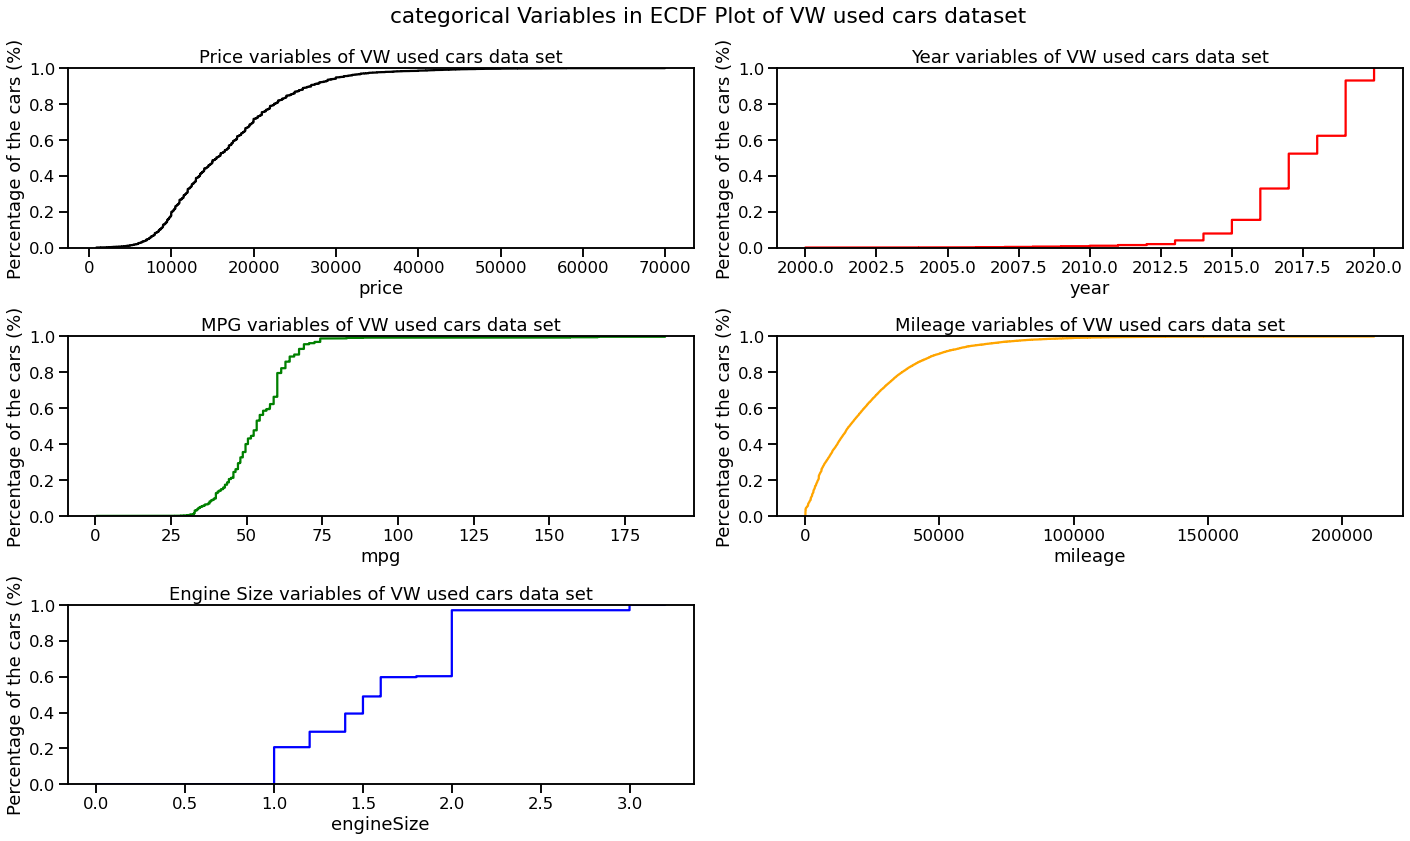

In [97]:
plt.figure(figsize=(20,12))

#Title of the Plot
plt.suptitle("categorical Variables in ECDF Plot of VW used cars dataset")

#Subplot row 1 column 1 price
plt.subplot(3,2,1)
sns.ecdfplot(data=df, x='price', color= "black")
plt.ylabel("Percentage of the cars (%)")
plt.title("Price variables of VW used cars data set")

#Subplot row 1 column 2 year
plt.subplot(3,2,2)
sns.ecdfplot(data=df, x='year', color= "red")
plt.ylabel("Percentage of the cars (%)")
plt.title("Year variables of VW used cars data set")


#Subplot row 2 column 1 miles per gallon
plt.subplot(3,2,3)
sns.ecdfplot(data=df, x='mpg', color= "green")
plt.ylabel("Percentage of the cars (%)")
plt.title("MPG variables of VW used cars data set")

#Subplot row 2 column 2 Mileage
plt.subplot(3,2,4)
sns.ecdfplot(data=df, x='mileage', color= "orange")
plt.ylabel("Percentage of the cars (%)")
plt.title("Mileage variables of VW used cars data set")

#Subplot row 3 column 1 engine size
plt.subplot(3,2,5)
sns.ecdfplot(data=df, x='engineSize', color= "blue")
plt.ylabel("Percentage of the cars (%)")
plt.title("Engine Size variables of VW used cars data set")

#Rotating the xticks
plt.xticks()

#Providing a range for the yticks
plt.yticks()

# keeping the individual plots separate from each other
plt.tight_layout()

#now showing the plots
plt.show()

These ECDF plots are providing us a clear idea to differentiate the car's with different different categories:
<br>
1.Price Subplot: This plot is showing that here a proportional relationship exist between percentage of cars and the prices of the cars.
<br>
<br>
2.Year Subplot:From the year subplot it can be said that percentage of cars are increasing and constant from time to time.But it is in it's peakpoint in year 2020.
<br>
<br>
3.MPG Subplot:This plot is indicating that MPG count is increasing gradually from 30 unit and keep increasing till 75 unit. After that it is in a constant level till 175 unit.
<br>
<br>
4.Mileage subplot: This plot is representing that percentage of cars are increasing successively till point 100000. But then it is in a constant level till 200000.
<br>
<br>
5.Engine Size Plot:From the engine size subplot it can be said that percentage of cars are increasing from size 1.0 and constant from time to time.But it is in it's peakpoint at size 2.0. After that it is in it's contant level till size 3.0.

**Violin Plot**

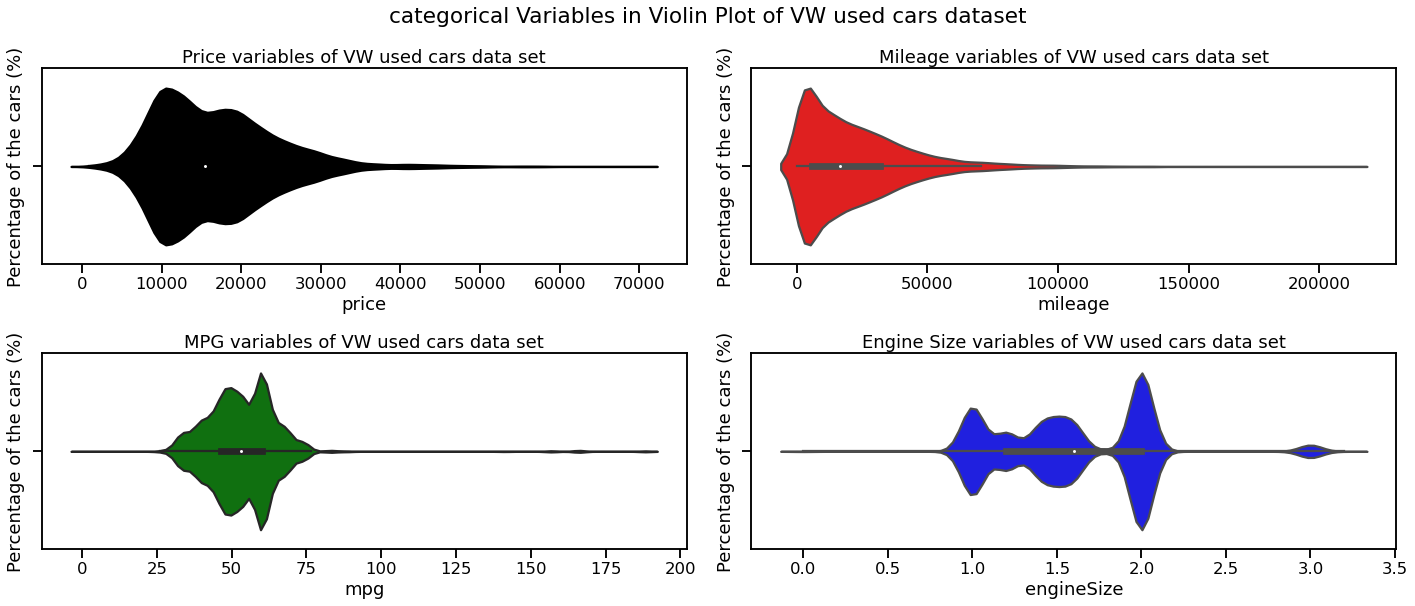

In [98]:
plt.figure(figsize=(20,12))

#Title of the Plot
plt.suptitle("categorical Variables in Violin Plot of VW used cars dataset")

#Subplot row 1 column 1 price
plt.subplot(3,2,1)
sns.violinplot(data=df, x='price', color= "black")
plt.ylabel("Percentage of the cars (%)")
plt.title("Price variables of VW used cars data set")

#Subplot row 1 column 2 mileage
plt.subplot(3,2,2)
sns.violinplot(data=df, x='mileage', color= "red")
plt.ylabel("Percentage of the cars (%)")
plt.title("Mileage variables of VW used cars data set")


#Subplot row 2 column 1 miles per gallon
plt.subplot(3,2,3)
sns.violinplot(data=df, x='mpg', color= "green")
plt.ylabel("Percentage of the cars (%)")
plt.title("MPG variables of VW used cars data set")

#Subplot row 2 column 2 engine size
plt.subplot(3,2,4)
sns.violinplot(data=df, x='engineSize', color= "blue")
plt.ylabel("Percentage of the cars (%)")
plt.title("Engine Size variables of VW used cars data set")

#Rotating the xticks
plt.xticks()

#Providing a range for the yticks
plt.yticks()

# keeping the individual plots separate from each other
plt.tight_layout()

#now showing the plots
plt.show()

Elaboration of the violin plots showinng above:
1.Price Subplot: This plot is clearly showing that with the increase of prices of cars the percentage of cars are decreasing.
<br>
<br>
2.Mileage Subplot:This plot is showing that when mileage is low, the number of cars are more. But when the mileage is increasing, so many cars may not be used or may be destroyed.
<br>
<br>
3.MPG subplot: This plot is reprenting that most of the car's MPG's are between 45 to 60.
<br>
<br>
4.Engine Size Subplot:Here the engine size is not in a sequential segment. But it is in it's peakpoint at 2.0.

# Data Aggregation

# EDA based on Model

In [99]:
df_agg_model = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_model)

,count,mean,sum
model,,,
Amarok,111,27991.495495,3107056
Arteon,248,26285.020161,6518685
Beetle,83,9881.638554,820176
CC,95,10645.642105,1011336
Caddy,6,12844.000000,77064
Caddy Life,8,17432.875000,139463
Caddy Maxi,4,11472.250000,45889
Caddy Maxi Life,59,19103.118644,1127084
California,15,57593.866667,863908


**Data Preprocessing before Visualization**

In [100]:
# sorting the dataframe based on the column 'count'
df_agg_model = df_agg_model.sort_values(by='count', ascending= False)

#Creating a new column percentage of the cars in each model
df_agg_model['percent_of_cars'] = (df_agg_model['count']/df_agg_model['count'].sum())*100

#Converting the 'sum column in millions
df_agg_model['sum'] = df_agg_model['sum']/1000000

#Keeping up to two decimal points
df_agg_model = df_agg_model.round(2)

#Removing the 'count' column
df_agg_model = df_agg_model.drop('count', axis=1)

display(df_agg_model.head())

,mean,sum,percent_of_cars
model,,,
Golf,16689.69,81.16,32.08
Polo,11341.43,37.28,21.69
Tiguan,21644.75,38.20,11.64
Passat,16684.68,15.27,6.04
Up,8029.43,7.10,5.83


**Barplot: Percentage of cars, Average and Total selling price of cars by model**
<br>
Based on model, searching:
<br>
1.Top 5 selling car models in the dataset.
<br>
2.The average selling price of the top 5 selling car models.
<br>
3.The total sale of the top 5 selling car models.

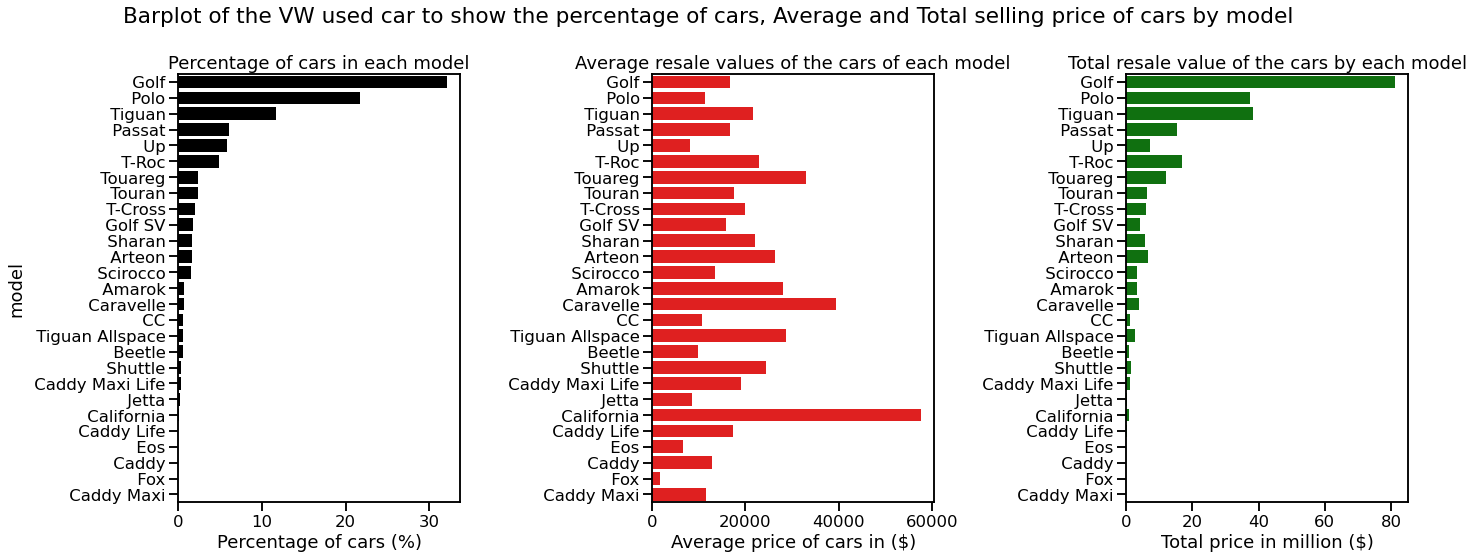

In [101]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_model.index, data=df_agg_model, orient='h', color='black')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_model.index, data=df_agg_model, orient='h', color='red')
plt.title("Average resale values of the cars of each model")
plt.xlabel("Average price of cars in ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_model.index, data=df_agg_model, orient='h', color='green')
plt.title("Total resale value of the cars by each model")
plt.xlabel("Total price in million ($)")
plt.ylabel("")

plt.suptitle("Barplot of the VW used car to show the percentage of cars, Average and Total selling price of cars by model")
plt.tight_layout()
plt.show()

# **EDA based on Transmission**

In [102]:
df_agg_transmission = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_transmission)

,count,mean,sum
model,,,
Amarok,111,27991.495495,3107056
Arteon,248,26285.020161,6518685
Beetle,83,9881.638554,820176
CC,95,10645.642105,1011336
Caddy,6,12844.000000,77064
Caddy Life,8,17432.875000,139463
Caddy Maxi,4,11472.250000,45889
Caddy Maxi Life,59,19103.118644,1127084
California,15,57593.866667,863908


**Data Preprocessing before Visualization**

In [103]:
# Sorting the dataframe based on the column 'count'
dff_agg_transmission = df_agg_transmission.sort_values(by='count', ascending=False)

#Creating a new column percentage of the cars in each model
df_agg_transmission['percent_of_cars'] = (df_agg_transmission['count']/df_agg_transmission['count'].sum())*100

# convert the 'sum' column in millions
df_agg_transmission['sum'] = df_agg_transmission['sum']/1000000

# keep up to two decimal points
df_agg_transmission = df_agg_transmission.round(2)

# remove the 'count' column
df_agg_transmission = df_agg_transmission.drop('count', axis=1)

display(df_agg_transmission.head())

,mean,sum,percent_of_cars
model,,,
Amarok,27991.50,3.11,0.73
Arteon,26285.02,6.52,1.64
Beetle,9881.64,0.82,0.55
CC,10645.64,1.01,0.63
Caddy,12844.00,0.08,0.04


**Barplot: Percentage of cars, Average and Total selling price of cars by transmission**
<br>
Based on transmission, searching:
<br>
1.Top 5 selling car models in the dataset.
<br>
2.The average selling price of the top 5 selling car models.
<br>
3.The total sale of the top 5 selling car models.

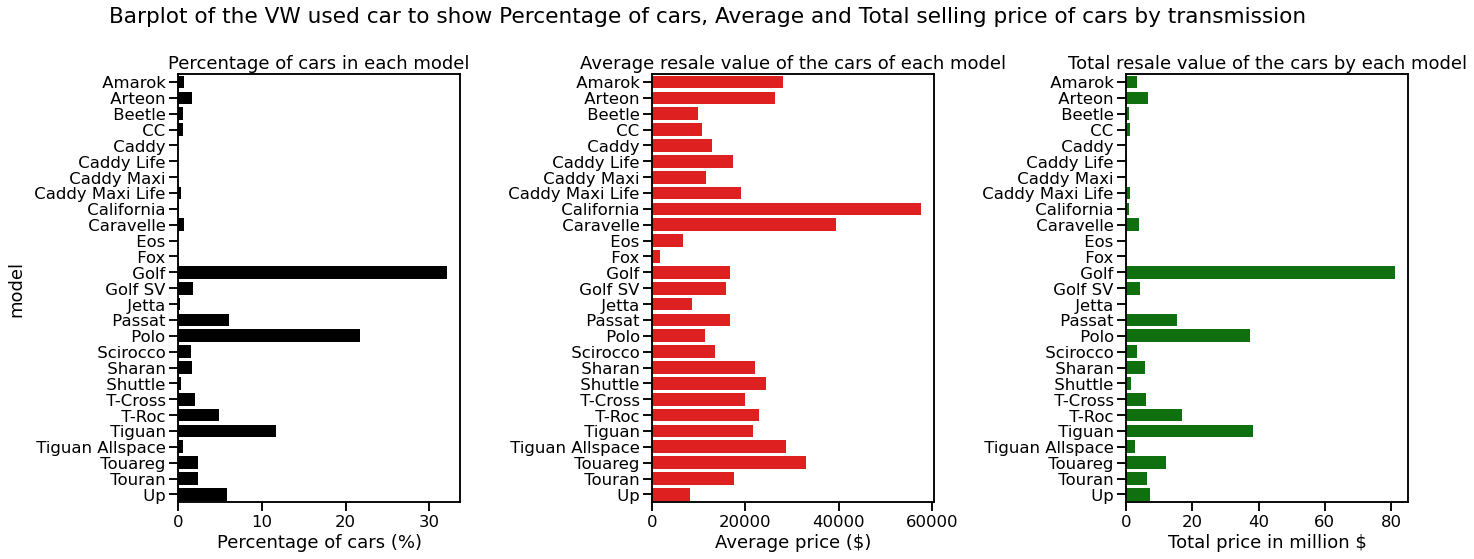

In [104]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='black')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='red')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='green')
plt.title("Total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the VW used car to show Percentage of cars, Average and Total selling price of cars by transmission")
plt.tight_layout()
plt.show()

# **EDA based on Fuel Type**

In [105]:
df_agg_fuelType = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_fuelType)

,count,mean,sum
model,,,
Amarok,111,27991.495495,3107056
Arteon,248,26285.020161,6518685
Beetle,83,9881.638554,820176
CC,95,10645.642105,1011336
Caddy,6,12844.000000,77064
Caddy Life,8,17432.875000,139463
Caddy Maxi,4,11472.250000,45889
Caddy Maxi Life,59,19103.118644,1127084
California,15,57593.866667,863908


**Data Preprocessing before Visualization**

In [106]:
# sort the dataframe based on the column 'count'
df_agg_fuelType = df_agg_fuelType.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_fuelType['percent_of_cars'] = (df_agg_fuelType['count']/df_agg_fuelType['count'].sum())*100

# convert the 'sum' column in millions
df_agg_fuelType['sum'] = df_agg_fuelType['sum']/1000000

# keep up to two decimal points
df_agg_fuelType = df_agg_fuelType.round(2)

# remove the 'count' column
df_agg_fuelType = df_agg_fuelType.drop('count', axis=1)

display(df_agg_fuelType.head())

,mean,sum,percent_of_cars
model,,,
Golf,16689.69,81.16,32.08
Polo,11341.43,37.28,21.69
Tiguan,21644.75,38.20,11.64
Passat,16684.68,15.27,6.04
Up,8029.43,7.10,5.83


**Barplot: Percentage of cars, Average and Total selling price of cars by fuelType**
<br>
Based on fuelType, searching:
<br>
1.Top 5 selling car models in the dataset.
<br>
2.The average selling price of the top 5 selling car models.
<br>
3.The total sale of the top 5 selling car models.

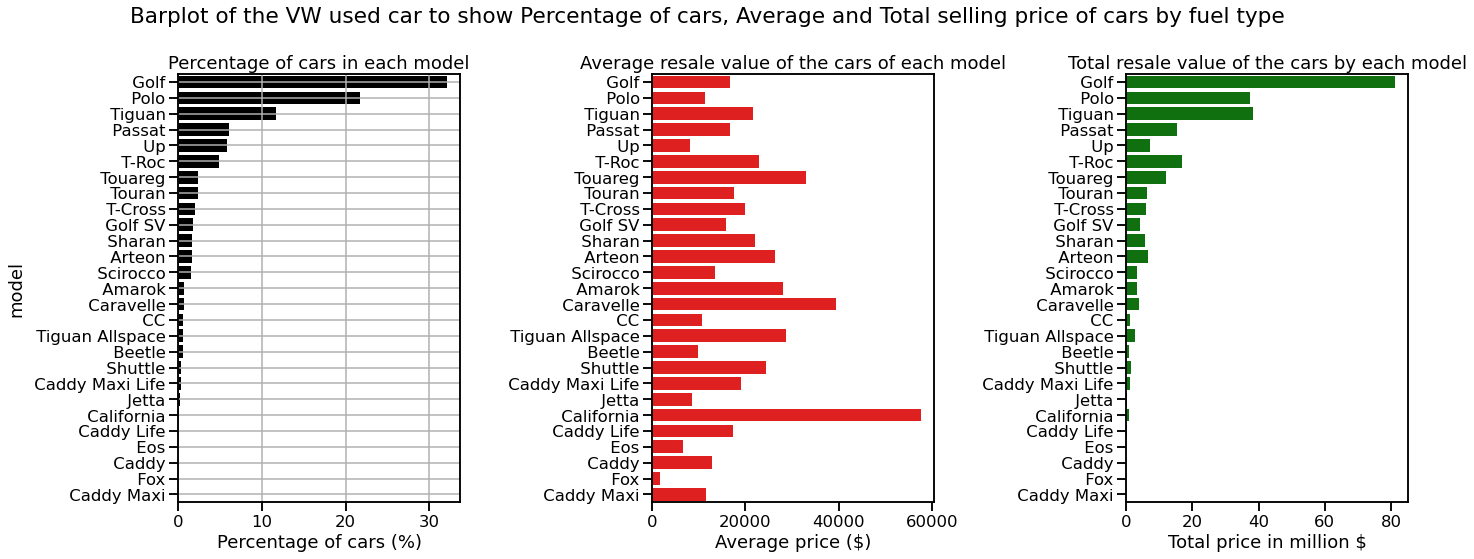

In [107]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='black')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='red')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='green')
plt.title("Total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the VW used car to show Percentage of cars, Average and Total selling price of cars by fuel type")
plt.tight_layout()
plt.show()

# Linear Regression

**Importing required Libraries**

In [108]:
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error

#import pandas as pd

**Load data**

In [109]:
df = pd.read_csv("vw.csv")

display(df.head(10))
print("Shape of the following Dataset is: ", df.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,39.8,1.5
5,T-Roc,2020,31895,Manual,10,Petrol,42.2,1.5
6,T-Roc,2020,27895,Manual,10,Petrol,42.2,1.5
7,T-Roc,2020,39495,Semi-Auto,10,Petrol,32.5,2.0
8,T-Roc,2019,21995,Manual,10,Petrol,44.1,1.0
9,T-Roc,2019,23285,Manual,10,Petrol,42.2,1.5


Shape of the following Dataset is:  (15157, 8)


In [110]:
df.info()
print("Column names of the given dataset: ", df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   mpg           15157 non-null  float64
 7   engineSize    15157 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 947.4+ KB
Column names of the given dataset:  Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')


**There are 5 numerical and 3 categorical variables exist in the dataset. As we know, machine only understands the numerals so we will do our experiment of training using numeric variables here. But later we will convert the categorical variables into numeric to calculate and train the machine.**

**Separating the features and target variable below:**

In [111]:
features = ['mileage', 'year', 'mpg', 'engineSize']
#here mileage,year,mpg and enginesize are feature variable
target = ['price']
#here price is target variable

x = df[features]
y = df[target]

print("Shape of Features: ", x.shape, "\nShape of Target: ", y.shape)

Shape of Features:  (15157, 4) 
Shape of Target:  (15157, 1)


**Creating Train and Test set below:**

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#x_train means training feature
#x_test means testing feature
#y_train means training target variable
#y_test means testing target variable

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(12125, 4) (3032, 4) (12125, 1) (3032, 1)


**Linear Regression**

In [113]:
model = LinearRegression()

model = model.fit(x_train, y_train)

**Prediction**

In [114]:
y_pred = model.predict(x_test)

In [115]:
print("Predicted Value: ", y_pred)

Predicted Value:  [[13865.0143481 ]
 [24971.69877535]
 [19559.80753035]
 ...
 [ 9592.74274532]
 [ 4825.24563734]
 [ 5633.54327228]]


In [116]:
#printing the actual value so that we can make a comparison
print(y_test)

       price
7342   14450
10328  23950
14992  10495
8466    9990
10347  21998
...      ...
8211   17250
8401   10450
9810   10290
7872    7499
9399    7290

[3032 rows x 1 columns]


**For the first data of the car, we can see the actual price of the car is 14450, where the predicted price is 24971. So here, the machine predicted (20071-14450=5621) more values.**
<br>
<br>
**For the second data of the car, we can see the actual price of the car is 23950, where the predicted price is 19559. So here, lower prediction exists.**
<br>
<br>
**Sometimes machine predicts more, sometimes less. So it's really clear that a huge difference between predicted and actual prices exist.**

**Prediction Error:**

In [117]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(RMSE)

3891.082004778721


**We got the RMSE value and that is around 3891.082. So we can realize that the prediction is showing around 3891.082 either more or less price. A huge valued error exist here. Let's update the model and lessen the error.**

# One Hot Encoding

In [118]:
df = pd.get_dummies(df, drop_first=True)

**Separating the featured and target variable**

In [119]:
# here price is the target variable
target = ['price']

#X = df[features]
X = df.drop('price', axis=1)
y = df[target]

print("Features Shape is: ", X.shape, "\nTarget shape is: ", y.shape)

Features Shape is:  (15157, 35) 
Target shape is:  (15157, 1)


**Creating train and test set**

In [120]:
# Training set and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12125, 35) (3032, 35) (12125, 1) (3032, 1)


**Training with Linear Regression**

In [121]:
#Creating a model for applying Linear Regression on the training set
model = LinearRegression()
model = model.fit(X_train, y_train)

**Linear Regression Coefficients and intercept**

In [122]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
29,model_ Up,-5292.025934
17,model_ Jetta,-4559.071876
6,model_ CC,-3548.346363
8,model_ Caddy Life,-3466.881119
10,model_ Caddy Maxi Life,-3390.557824
19,model_ Polo,-3195.850273
20,model_ Scirocco,-2857.999461
16,model_ Golf SV,-2789.141158
7,model_ Caddy,-2182.982055
5,model_ Beetle,-2023.234903


**prediction**

In [123]:
y_pred = model.predict(X_test)

In [124]:
print(y_pred)

[[12869.20651873]
 [23850.70836897]
 [13526.6767613 ]
 ...
 [ 9295.26406926]
 [ 4972.09419091]
 [ 5855.52104452]]


**Prediction Error**

In [125]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [126]:
# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

# mean absolute percentage error: : lower is better
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("mean absolute percentage error = ", MAPE, "%")

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)

mean absolute error =  1832.129093660342
mean absolute percentage error =  13.068943957145585 %
mean squared error =  6783022.165714476
root mean squared error =  2604.4235764780037
coefficient of determination =  0.88569561775602


(i) Here the value of coefficient of determination is 0.8857. so it can be said that this is a perfect model.
<br>
(ii)Absolute percentage error is about 13.06%

**Comparing the actual and predicted target variable through visualization**

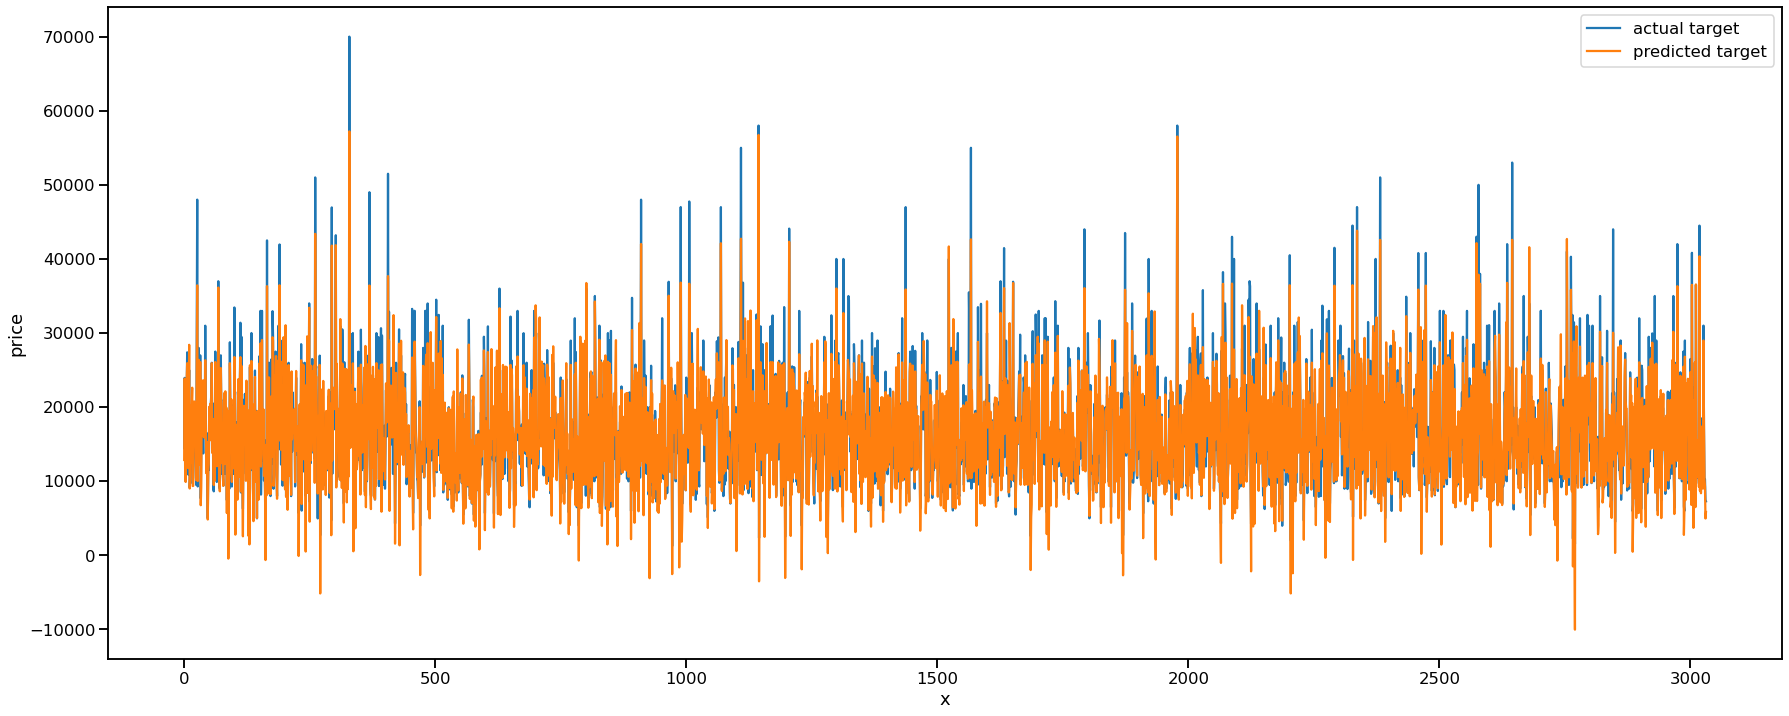

In [127]:
#Line Plot
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()

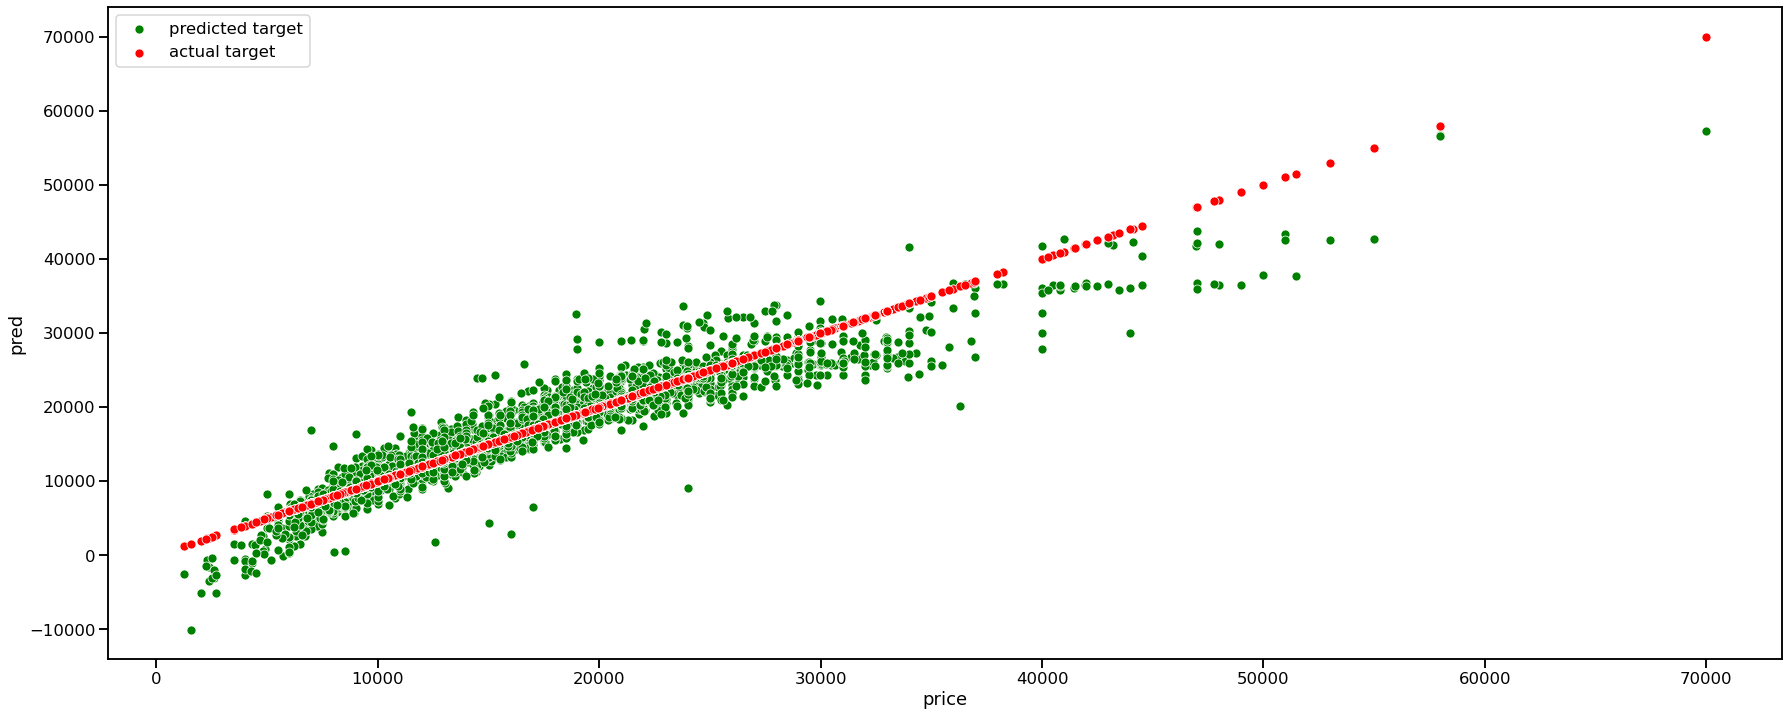

In [128]:
# Scatter Plot
plt.figure(figsize=(30,12))

sns.scatterplot(x='price', y='pred', data=y_test, color='green', label='predicted target')

sns.scatterplot(x='price', y='price', data=y_test, color='red', label='actual target')
plt.show()

**From the above visualization, we can measure that the predicted values are around to the actual values but not always.**
<br>
<br>
**When the prices are between 5000 USD to 30000, the model is showing the accurate values. Beyond this range, the model is not providing accurate results.**
<br>
<br>
**Some values are less than zero (negative).**

**This model is not appropriate enough to predict the dataset properly.**